<a href="https://colab.research.google.com/github/entomolab/DevBug/blob/main/devbug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Costa Rica BIG DATA School**
December, 2022

# Carga de los objetos necesarios del model SIR

In [ ]:
import numpy as np
import random


# Person Object AKA Joe
class Person(object):
    def __init__(self):
        self.status = "Susceptible"
        self.days_sick = 0
        self.sickness_rate = 10
        self.Interaction = []
        self.masked = False
        self.vaccine = 0
        
    def maskUp(self, wears_mask):
        if (wears_mask):
            self.set_sickness_rate(self.sickness_rate/2)
            self.masked = True
    
    def set_sickness_rate(self, new_rate):
        self.sickness_rate = new_rate

    def get_vaccine(self):
      return self.vaccine
    
    def infect(self, number_of_days_sick):
        self.status = "Infected"
        self.days_sick = number_of_days_sick
    
    def recover(self):
        self.status = "Recovered"
        self.days_sick = 0
    
    def update(self):
        if (self.status == "Susceptible"):
            self.roll_for_infection()
            
        elif (self.status == "Infected"):            
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()

    def update_days_sick(self):
        if (self.status == "Infected"):            
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()

    def vaccination(self):
      if self.vaccine < 4:
        self.vaccine += 1
        self.set_sickness_rate(self.sickness_rate -(0.5)
           
    def roll_for_infection(self):
        is_sick = (random.randint(0,101) < self.sickness_rate)
        if (is_sick):
            self.infect(4)

In [ ]:
# Population Object
class Population:
    def __init__(self, number=100, interaction=10, percentage_masked=0):
        self.People = []
        self.number = number
        self.interaction = interaction
        self.percentage_masked = percentage_masked
        
        if (number < 100):
            self.number = 100
        
        if (interaction < 10):
            self.interaction = 10
        
        ##build our population
        patient_Zero = Person()
        patient_Zero.infect(5)
        
        self.People.append(patient_Zero)
        
        for i in range(0,number):
            p = Person()
            if (i < number*(self.percentage_masked/100.0) and self.percentage_masked>0):
                p.maskUp(True)
            self.People.append(p)
     
    def number_of_sick(self):
        sick_Count = 0
        for j in self.People:
            if (j.status == "Infected"):
              sick_Count = sick_Count + 1
                
        return sick_Count
    
    def number_of_recovered(self):
        recovered_Count = 0
        for j in self.People:
            if (j.status == "Recovered"):
                recovered_Count = recovered_Count + 1
        
        return recovered_Count
    
    def number_of_susceptible(self):
        susceptible_Count = 0
        for j in self.People:
            if (j.status == "Susceptible"):
                susceptible_Count = susceptible_Count + 1
                
        return susceptible_Count
    
    def number_masked(self):
        masked_Count = 0
        for j in self.People:
            if (j.masked):
                masked_Count = masked_Count + 1
        
        return masked_Count
    
    def number_masked_sick(self):
        masked_SickCount = 0
        for j in self.People:
            if (j.masked and j.status == "Infected"):
                masked_SickCount = masked_SickCount + 1
        
        return masked_SickCount

###Por aca vamos.....
    def number_vacO(self):
        masked_SickCount = 0
        for j in self.People:
            if (j.masked and j.status == "Infected"):
                masked_SickCount = masked_SickCount + 1
        
        return masked_SickCount

    def mass_vaccination(self, time):
      amount_people = self.People.len() * 0.4
      for i in range(0, amount_people):
        r = random.randint(0, self.People.len())
        if (people[r].get_vaccine() < time):
            person.vaccination()
        else:
          i -= 1

    ## Here's the brains of the Population class (and our code)
    ## the update will be ran everyday (meaning, every iteration of our while loop)
    ## build interaction tables (who interacted with whom)
    ## if marked sick they must roll to see if (one per interaction)
    ## if I interacted with 10 people, each of them must roll and vice versa if they
    ## they were marked as infected
    def update(self):
        ## people who are might get sick
        might_Get_Sick = []
        
        for person in self.People:
            
            #clear out your interactions per day
            person.Interaction = []
            
            ##These are the n number of people that you interact with
            for i in range(0, self.interaction):
                r = random.randint(0,self.number)
                person.Interaction.append(r)
                
            ##if "person" is Infected, every single person they interacted with might get sick
            if (person.status == "Infected"):
                person.update_days_sick()
                
                for m in person.Interaction:
                    if (self.People[m].status == "Susceptible"): #only susceptible people can get sick
                        might_Get_Sick.append(self.People[m])
            
            ##if "person" is susceptible and they interact w/ someone who is "infected" 
            ##person gets added to the "might get sick"
            if (person.status == "Susceptible"):
                for m in person.Interaction:
                    if (self.People[m].status == "Infected"):
                        might_Get_Sick.append(person)
            
        ##Now! We're going to roll through our "Might Get Sick" and they each roll a die
        ##this is only a list of susceptible people
        for p in might_Get_Sick:
            p.roll_for_infection()

In [ ]:
# Define the Community
# Population( size_of_population, number_of_interactions, percentage_wearing_masks)
myCommunity = Population(8000,10,50)
day = 0
my_plot = []
number_sick = myCommunity.number_of_sick()
while (number_sick > 0):
    number_sick = myCommunity.number_of_sick()
    number_recovered = myCommunity.number_of_recovered()
    number_masked = myCommunity.number_masked()
    number_masked_sick = myCommunity.number_masked_sick()
    number_vaccine = myCommunity.
    
    my_plot.append([day, number_sick, number_recovered])
    
    if (myCommunity.percentage_masked > 0):
        print ("day:", day, "Number of sick:", number_sick, "Hosptalized:", number_sick*(.04), "Sick Mask Wearers:", number_masked_sick, "Mask Wearers:", number_masked)
    else:
        print ("day:", day, "Number of sick:", number_sick)
    
    day = day+1
    myCommunity.update()

#print ("day:", day, "Number of sick:", myCommunity.number_of_sick())
print ("Number recovered:", myCommunity.number_of_recovered())
print ("Number susceptible:", myCommunity.number_of_susceptible())

SyntaxError: ignored

In [ ]:
def myCommunityTests(pop_test, interactions_test, masked_test):
    # Population( size_of_population, number_of_interactions, percentage_wearing_masks)
    myCommunity = Population(pop_test,interactions_test,masked_test)
    day = 0
    my_plot = []
    number_sick = myCommunity.number_of_sick()
    while (number_sick > 0):
        number_sick = myCommunity.number_of_sick()
        number_recovered = myCommunity.number_of_recovered()
        number_masked = myCommunity.number_masked()
        number_masked_sick = myCommunity.number_masked_sick()
    
        my_plot.append([day, number_sick, number_recovered])
    
        if (myCommunity.percentage_masked > 0):
            print ("day:", day, "Number of sick:", number_sick, "Hosptalized:", number_sick*(.04), "Sick Mask Wearers:", number_masked_sick, "Mask Wearers:", number_masked)
        else:
            print ("day:", day, "Number of sick:", number_sick)
    
        day = day+1
        myCommunity.update()

    #print ("day:", day, "Number of sick:", myCommunity.number_of_sick())
    print ("Number recovered:", myCommunity.number_of_recovered())
    print ("Number susceptible:", myCommunity.number_of_susceptible())

In [ ]:
myCommunityTests(500, 3, 40)

In [ ]:
# Alter the myCommunityTests function to ouput wanted data to a csv

#Ex: Population_Size, Number_Interactions, Percentage_Masked, Total_Days, Number_Recovered, Number_Suceptible, Max_Sick, Max_Hospitalized
import pandas as pd

def myCommunityTests_toDict(pop_test, interactions_test, masked_test, hospitalization_rate = .04):
    # Population( size_of_population, number_of_interactions, percentage_wearing_masks)
    myCommunity = Population(pop_test,interactions_test,masked_test)
    day = 0
    my_plot = []
    simulation_sumary = {
        "Population_Size" : pop_test,
        "Number_Interactions" : interactions_test,
        "Percentage_Masked" : masked_test,
        "Hospitalization_Rate" : hospitalization_rate
    }
    
    number_sick = myCommunity.number_of_sick()
    while (number_sick > 0):
        number_sick = myCommunity.number_of_sick()
        number_recovered = myCommunity.number_of_recovered()
        number_masked = myCommunity.number_masked()
        number_masked_sick = myCommunity.number_masked_sick()
    
        my_plot.append([day, number_sick, number_recovered, number_sick*(hospitalization_rate), number_masked_sick, number_masked])
    
        #if (myCommunity.percentage_masked > 0):
            #print ("day:", day, "Number of sick:", number_sick, "Hosptalized:", number_sick*(hospitalization_rate), "Sick Mask Wearers:", number_masked_sick, "Mask Wearers:", number_masked)
        #else:
            #print ("day:", day, "Number of sick:", number_sick)
    
        day = day+1
        myCommunity.update()
    
    dataset = pd.DataFrame(my_plot, columns=['day','number_sick', 'number_recovered','hosptalized', 'sick_mask_wearers','mask_wearers' ])
    #print ("day:", day, "Number of sick:", myCommunity.number_of_sick())
    #print ("Number recovered:", myCommunity.number_of_recovered())
    simulation_sumary["recovered"] = myCommunity.number_of_recovered()
    #print ("Number susceptible:", myCommunity.number_of_susceptible())
    simulation_sumary["susceptible"] = myCommunity.number_of_susceptible()
    #print (dataset.head())
    simulation_sumary["total_days"] = dataset["day"].max()
    simulation_sumary["max_sick"] = dataset["number_sick"].max()
    simulation_sumary["max_hosptalized"] = dataset["hosptalized"].max()
    simulation_sumary["max_sick_mask_wearers"] = dataset["sick_mask_wearers"].max()
    simulation_sumary["total_mask_wearers"] = dataset["mask_wearers"].max()
    
    print(simulation_sumary)
    return simulation_sumary

In [ ]:
myCommunityTests_toDict(5000, 5, 50)

{'Population_Size': 5000, 'Number_Interactions': 5, 'Percentage_Masked': 50, 'Hospitalization_Rate': 0.04, 'recovered': 4942, 'susceptible': 59, 'total_days': 24, 'max_sick': 3686, 'max_hosptalized': 147.44, 'max_sick_mask_wearers': 1799, 'total_mask_wearers': 2500}


{'Population_Size': 5000,
 'Number_Interactions': 5,
 'Percentage_Masked': 50,
 'Hospitalization_Rate': 0.04,
 'recovered': 4942,
 'susceptible': 59,
 'total_days': 24,
 'max_sick': 3686,
 'max_hosptalized': 147.44,
 'max_sick_mask_wearers': 1799,
 'total_mask_wearers': 2500}

In [ ]:
import csv

test_population = 3000
maximum_interactions = 10
maximum_mask_percentage = 20
hospital_rate = .4

# Name of the output csv file
filename = "mycsvfile0.csv"


for i in range(0, maximum_interactions, 1):
     for m in range(0, maximum_mask_percentage, 1):
        
          sim_data = myCommunityTests_toDict(test_population, i, m, hospital_rate)
          print(sim_data)
    
          if (i == 0 and m == 0):
             with open(filename, 'w') as f:  
                 w = csv.DictWriter(f, sim_data.keys())
                 w.writeheader()
          else:
              with open(filename, 'a') as f:  # You will need 'wb' mode in Python 2.x
                w = csv.DictWriter(f, sim_data.keys())
                w.writerow(sim_data)

In [ ]:
from sklearn import linear_model

# import the dataset into a pandas DataFrame
import pandas as pd
import numpy as np

In [ ]:
diseaseData = pd.read_csv("mycsvfile.csv") 

In [ ]:
# Create training and test datasets where train contains the variables and test the results
train_percentage = .4 #train based on 80% of the dataset

msk = np.random.rand(len(diseaseData)) < train_percentage
print(msk)
train = diseaseData[msk]
test = diseaseData[~msk]

print("Number of Training Samples:",len(train))
print("Number of Test Samples:",len(test))

# Create X and Y datasets for both train and test where 
# X contains the variables and Y the results

#variable to check against
#test_variable = "max_sick"
test_variable = "max_sick_mask_wearers"


train_X = train.drop(columns =[test_variable])
train_Y = train[test_variable]
test_X = test.drop(columns =[test_variable])
test_Y = test[test_variable]

In [ ]:
regr = linear_model.LinearRegression()

NameError: ignored

In [ ]:
regr.fit(train_X, train_Y)

LinearRegression()

In [ ]:
print(regr.coef_) 

[ 0.00000000e+00 -4.10612366e-01 -3.01725269e+01 -7.71302035e+07
  4.99646173e+10  4.99646173e+10 -5.99447734e-01  4.17930969e+10
 -1.04482742e+11  1.80498403e+00]


In [ ]:
np.mean((regr.predict(test_X) - test_Y)**2)

49.68351499495968

In [ ]:
regr.score(test_X, test_Y)

0.9970561968272293

# Graphical analysis

In [ ]:
import seaborn as sns #importando Seaborn

In [ ]:
sns.joinplot(x='a', 
           y='Hospitalization_Rate', 
           hue='amount_vaccine', 
           col="time", data=diseaseData)

AttributeError: ignored

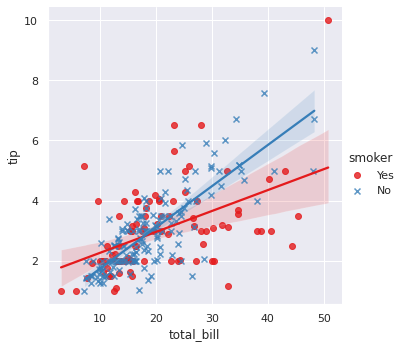

In [24]:
sns.set_theme(style="darkgrid")
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False, hue='smoker',
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

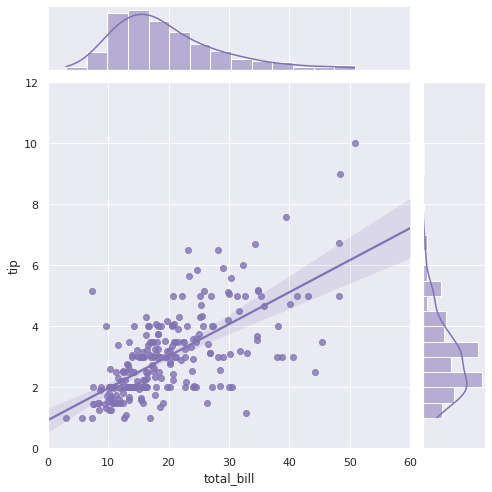

In [22]:
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")

g = sns.jointplot(x="total_bill", 
                  y="tip", 
                  data=tips,
                  kind="reg", 
                  truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

In [34]:
import matplotlib.pyplot as plt
import numpy as np

tips

total_bill = tips['total_bill']
tip = tips['tip']

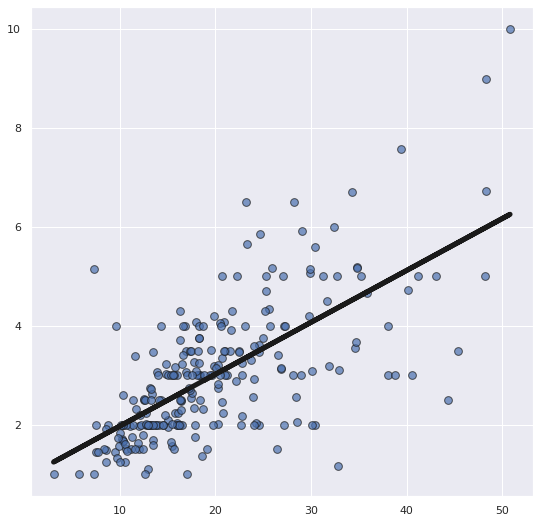

In [39]:
fig, ax = plt.subplots(figsize = (9, 9))

ax.scatter(total_bill, tip, s=60, alpha=0.7, edgecolors="k")
b, a = np.polyfit(total_bill, tip, deg=1)
ax.plot(total_bill, a + b * total_bill, color="k", lw=3);